<a href="https://colab.research.google.com/github/HST0077/HYOTC/blob/main/StepDown_1stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plain Vanilla Put Option 평가하기

In [ ]:
!pip install hst_funcs

In [ ]:
# BS 공식에 의한 풋옵션 평가
from hst_funcs.finanace.Equity import BS

# 파라미터 설정
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.3

opt0 = BS.bs_put(S0, K, T, r, sigma)
print('옵션 현재가치: ', opt0)

옵션 현재가치:  9.354197236057225


In [ ]:
# MC를 이용한 풋옵션 함수 작성

def MC_Put(S,K,T,r,sigma,n_sim=100000):
    import numpy as np
    # 난수 생성 (표준 정규분포)
    np.random.seed(11)
    Z = np.random.randn(n_sim)
    # 만기가격 도출
    ST = S * np.exp((r - 0.5 * sigma**2) * T\
                     + sigma * np.sqrt(T) * Z)
    # 풋옵션의 페이오프 계산
    payoff = np.maximum(K-ST, 0)
    # 현재가치 할인 적용 (할인율: e^(-rT))
    put_price = np.exp(-r * T) * np.mean(payoff)
    return put_price

In [ ]:
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 풋옵션 가격: " \
      f"{MC_Put(100, 100, 1, 0.05, 0.3):.4f}")
print(f"블랙숄즈 공식 기반 풋옵션 가격: " \
      f"{BS.bs_put(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 풋옵션 가격: 9.2751
블랙숄즈 공식 기반 풋옵션 가격: 9.3542


In [ ]:
def MC_Greeks(fun, S, K, T, r, sigma):
    # Delta (Δ)
    eps=S*sigma*0.01
    C_plus = fun(S + eps, K, T, r, sigma)
    C_minus = fun(S - eps, K, T, r, sigma)
    Delta = (C_plus - C_minus) / (2 * eps)
    # Gamma (Γ)
    C_0 = fun(S, K, T, r, sigma)
    Gamma = (C_plus - 2 * C_0 + C_minus) / (eps ** 2)
    # Vega (V)
    eps=sigma*0.01
    C_sigma_plus = fun(S, K, T, r, sigma + eps)
    C_sigma_minus = fun(S, K, T, r, sigma - eps)
    Vega = (C_sigma_plus - C_sigma_minus) / (2 * eps)
    Vega = 0.01*Vega # 1% 베가로 변환
    # 1day Theta (Θ)
    eps=0.01
    C_t = fun(S, K, T - eps, r, sigma)
    Theta = (1/365)*(C_t - C_0) / eps
    # 1bp Rho (ρ)
    C_r_plus = fun(S, K, T, r + eps, sigma)
    C_r_minus = fun(S, K, T, r - eps, sigma)
    Rho = 0.0001* (C_r_plus - C_r_minus) / (2 * eps)
    return {
        "Price": C_0,
        "Delta (Δ)": Delta,
        "Gamma (Γ)": Gamma,
        "Theta (Θ)": Theta,
        "Vega (V)": Vega,
        "Rho (ρ)": Rho,
    }

In [ ]:
res=MC_Greeks(MC_Put, 100, 100, 1, 0.05, 0.3)
res

{'Price': np.float64(9.275129383003724),
 'Delta (Δ)': np.float64(-0.37516958155066504),
 'Gamma (Γ)': np.float64(0.01162181001753816),
 'Theta (Θ)': np.float64(-0.009135373917150295),
 'Vega (V)': np.float64(0.3772682484415787),
 'Rho (ρ)': np.float64(-0.004678548225085848)}

In [ ]:
# Gamma (Γ)
Gamma=res["Gamma (Γ)"]
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 감마: {Gamma:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 감마: {BS.put_gamma(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 감마: 0.0116
블랙숄즈 공식 기반 콜옵션 감마: 0.0126


In [ ]:
# Vega (V)
Vega=res["Vega (V)"]

# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 베가: {Vega:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 베가: {BS.put_vega(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 베가: 0.3773
블랙숄즈 공식 기반 콜옵션 베가: 0.3794


In [ ]:
# 1day Theta (Θ)
Theta=res["Theta (Θ)"]
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 세타: {Theta:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 세타: {BS.put_theta(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 세타: -0.0091
블랙숄즈 공식 기반 콜옵션 세타: -0.0092


In [ ]:
# 1bp Rho (ρ)
Rho=res["Rho (ρ)"]
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 르호: {Rho:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 르호: {BS.put_rho(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 르호: -0.0047
블랙숄즈 공식 기반 콜옵션 르호: -0.0047


## 1 Stock Step Down 상품 평가하기

In [3]:
# 주말 제외한 6개월마다의 날짜 생성
import pandas as pd

D0=pd.date_range('2025-12-10',periods=6,freq=pd.DateOffset(months=6))
D0

DatetimeIndex(['2025-12-10', '2026-06-10', '2026-12-10', '2027-06-10',
               '2027-12-10', '2028-06-10'],
              dtype='datetime64[ns]', freq='<DateOffset: months=6>')

In [4]:
# 대한민국의 달력기준으로 데이터 만들기
import holidays # 별도로 설치하여야 함

# 주말을 제외한 대한민국의 휴일 정보를 가져온다.
kor_holidays=list(holidays.KOR(years=range(2025,2029)).keys()) #list()데이터로 변환
kor_holidays=pd.to_datetime(kor_holidays) # 데이터프레임 날짜로 변환

# Business days로 6개의 날짜 생성
D_samples=pd.date_range('2025-12-10',periods=6,freq=pd.DateOffset(months=6))

# 생성된 날짜에서 대한민국 휴일 제외
# 아래에서 사용된 isin()은 존재하는지를 확인하는 내장함수
D0=D_samples[~D_samples.isin(kor_holidays)] # 휴일정보에 포함되지 않는 날짜만 추출
D0

DatetimeIndex(['2025-12-10', '2026-06-10', '2026-12-10', '2027-06-10',
               '2027-12-10', '2028-06-10'],
              dtype='datetime64[ns]', freq='<DateOffset: months=6>')

In [6]:
import pandas as pd
import holidays
from datetime import datetime

# 대한민국 공휴일 불러오기
kor_holidays = list(holidays.KOR(years=range(2025, 2031)).keys())
kor_holidays = pd.to_datetime(kor_holidays)

# 오늘 날짜
today = pd.to_datetime(datetime.today().date())
six_months_later = today + pd.DateOffset(months=6)

# 6개월마다의 기준일 생성
month_starts = pd.date_range(start=six_months_later, periods=6, freq=pd.DateOffset(months=6))

# 각 기준일에서 해당 월의 첫 번째 영업일(공휴일 제외) 추출
business_days = []
for dt in month_starts:
    # 시작 날짜부터 한 달간의 영업일 추출
    month_range = pd.date_range(start=dt, end=dt + pd.offsets.MonthEnd(0), freq='B')
    # 영업일이 대한민국의 휴일이 아닌 것을 다시 추출출
    valid_days = [d for d in month_range if d not in kor_holidays]
    if valid_days: # 자료가 있다면
        business_days.append(valid_days[0])

# 결과 출력
print(business_days)


[Timestamp('2026-07-03 00:00:00'), Timestamp('2027-01-04 00:00:00'), Timestamp('2027-07-05 00:00:00'), Timestamp('2028-01-03 00:00:00'), Timestamp('2028-07-03 00:00:00'), Timestamp('2029-01-03 00:00:00')]


In [7]:
from datetime import datetime

# 날짜 차이 계산 (단위: 일수)
days_diff = [(d - today).days for d in business_days]

# DataFrame 생성
df = pd.DataFrame({
    '영업일': [d.strftime('%Y-%m-%d') for d in business_days],
    '오늘까지 남은 일수': days_diff})
df

,영업일,오늘까지 남은 일수
0,2026-07-03,181
1,2027-01-04,366
2,2027-07-05,548
3,2028-01-03,730
4,2028-07-03,912
5,2029-01-03,1096


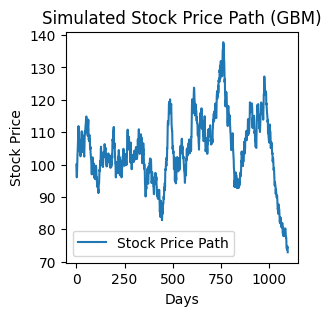

In [8]:
# 시뮬레이션 횟수 만큼 주가 생성하기
import numpy as np
import matplotlib.pyplot as plt

# 주가 경로 생성
N=df['오늘까지 남은 일수'].iloc[-1] # 만기까지의 날짜수
sim=1000 # 시뮬레이션 회수
r,sigma=0.05, 0.3
dt=1/365

np.random.seed(111)
W = np.random.randn(N,sim)  # 표준 정규분포 난수

# log(S) 행렬 만들기
lnS=(r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * W

# 앞에 붙이기
lnS = np.insert(lnS,0,np.log(100), axis=0)
# 누적합 구하기
S=np.exp(np.cumsum(lnS,axis=0))

# 첫번째 시뮬레이션 결과 시각화
plt.figure(figsize=(3,3))
plt.plot(S[:,0], label="Stock Price Path")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Price Path (GBM)")
plt.legend()
plt.show()

In [ ]:
def SD_lstar_CPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim):
    import numpy as np
    from scipy.stats import norm

    """
    ELS (Equity-Linked Securities) 조기상환 및 만기상환 시뮬레이션

    Parameters:
    - S: 초기 주가
    - kijun: 기준 가격
    - K: 행사가격
    - T: 옵션 만기 (일 단위)
    - c: 조기상환 행사가 (0.01 이상)
    - r: 무위험 이자율
    - q: 배당률
    - sigma: 변동성
    - barrier: 배리어 (예: 65% 미만일 경우 지급)
    - dummy: 배리어 이벤트 여부 (0 또는 1)
    - sim: 시뮬레이션 횟수

    Returns:
    - mu: 최종 가격의 정규분포 적합 결과 (평균, 표준편차)
    """



    # 주가 경로 생성
    N=T[-1] # 만기까지의 날짜수
    np.random.seed(111)
    W = np.random.randn(N,sim)  # 표준 정규분포 난수
    dt=1/365

    # log(S) 행렬 만들기
    lnS=(r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * W

    # 앞에 붙이기
    lnS = np.insert(lnS,0,np.log(S), axis=0)
    # 누적합 구하기
    S=np.exp(np.cumsum(lnS,axis=0))

     # 수익률 행렬 변환
    R = S / kijun

    Price = np.zeros(sim)  # 최종 옵션 가격 배열

    EN=len(K) # 조기상환 회차수
    for i in range(EN):
        out = np.where((Price == 0) & (R[T[i], :] >= K[i]))  # 아직 상환되지 않은 경우만 선택
        # 조기상환된 경우 가격 업데이트
        Price[out] = 10000 * (1 + c[i]) * np.exp(-r * (T[i]) / 365)

    # 만기상환 테스트
    check = np.where(Price == 0) # 아직 상환되지 않은 경우의 인덱스 추출

    # 만기 손실 체크
    for idx in check:
        if np.min(R[:,idx]) < barrier: # 해당 sim 회차의 최소값이 배리어 미만이면?
            # 배리어 하외 하면 R값으로 리턴
            Price[idx] = 10000 * (R[-1, idx]) * np.exp(-r * T[-1]/365)
        else: # 배리어를 한번도 친적이 없으면 마지막 쿠폰 지급
            Price[idx] = 10000 * (1 + dummy) * np.exp(-r * T[-1]/365)

    # 정규분포 적합
    mu, s = norm.fit(Price)

    return mu

In [ ]:
# 스텝다운 상품 평가 정보
S0=100
kijun=100
r=0.035
q=0
sigma, barrier, dummy, sim=0.3, 0.65, 0.132,10000
K=[0.95,0.95,0.95,0.90,0.90,0.85]
T=np.array(df['오늘까지 남은 일수'])
c=np.array([1,2,3,4,5,6])*0.022

SD_lstar_CPU(S0, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

np.float64(9198.859724696784)

In [1]:
def SD_lstar_GPU(S0, kijun, K, T, c, r, q, sigma, barrier, dummy, sim):
    import cupy as cp
    from scipy.stats import norm  # 정규분포 적합은 여전히 CPU에서 수행
    import numpy as np

    """
    ELS (Equity-Linked Securities) 조기상환 및 만기상환 시뮬레이션 (GPU 버전)
    """

    N = T[-1]  # 전체 만기까지의 날짜 수
    dt = 1 / 365  # 하루 단위
    cp.random.seed(111)
    W = cp.random.randn(N, sim)  # 표준 정규분포 난수 생성

    # 로그 수익률 경로 생성
    lnS = (r - 0.5 * sigma**2) * dt + sigma * cp.sqrt(dt) * W

    # 시작값 log(S0)를 앞에 추가
    lnS = cp.concatenate([cp.full((1, sim), cp.log(S0)), lnS], axis=0)

    # 누적합 후 지수화하여 주가 경로 생성
    S_path = cp.exp(cp.cumsum(lnS, axis=0))

    # 수익률 행렬 계산
    R = S_path / kijun

    # 초기 옵션 가격 배열
    Price = cp.zeros(sim)

    EN = len(K)

    # 조기상환여부 판단
    for i in range(EN):
        # 현재 가격이 0이고, 조기상환일(T[i])의 수익율이 행사가 이상인 인덱스 추출
        cond = (Price == 0) & (R[T[i], :] >= K[i])
        # 해당 인덱스의 값을, 조기상환쿠폰(c[i])으로 상환되며 이를 현재가로 변환
        Price = cp.where(cond, 10000 * (1 + c[i]) * cp.exp(-r * T[i] / 365), Price)

    # 아직 상환되지 않은 시뮬레이션 인덱스 찾기
    check = (Price == 0)

    # 배리어 하회 여부 확인
    min_R = cp.min(R, axis=0) # 각 시뮬레이션에서 최소 수익율 인덱스 추출
    barrier_hit = (min_R < barrier) & check # 미상환된 종목주 최소 수익율일 배리어보다 작은 인덱스 추출
    no_barrier_hit = ~barrier_hit & check # 미상환된 종목주 최소 수익율일 배리어를 터치하지 않은 인덱스 추출

    # 배리어 하회한 경우
    Price = cp.where(barrier_hit, 10000 * R[-1, :] * cp.exp(-r * T[-1] / 365), Price)

    # 배리어를 한 번도 안 맞은 경우
    Price = cp.where(no_barrier_hit, 10000 * (1 + dummy) * cp.exp(-r * T[-1] / 365), Price)

    # GPU에서 CPU로 데이터 이동하여 정규분포 적합
    Price_cpu = cp.asnumpy(Price)
    mu, s = norm.fit(Price_cpu)

    return mu


In [9]:
import numpy as np

# 스텝다운 상품 평가 정보
S0=100
kijun=100
r=0.035
q=0
sigma, barrier, dummy, sim=0.3, 0.65, 0.132,10000
K=[0.95,0.95,0.95,0.90,0.90,0.85]
T=np.array(df['오늘까지 남은 일수'])
c=np.array([1,2,3,4,5,6])*0.022

SD_lstar_GPU(S0, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

np.float64(9248.21416045588)

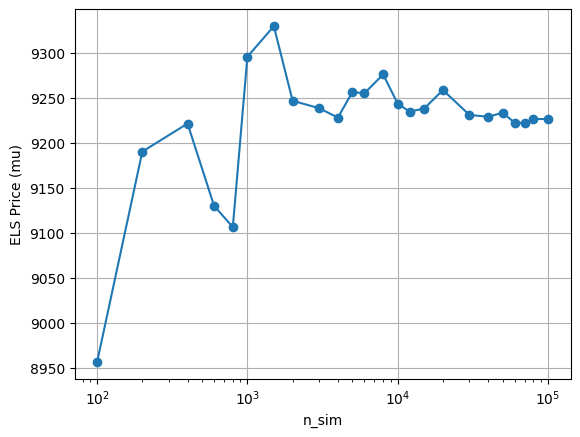

In [ ]:
Sims=[100,200,400,600,800,1000,1500,2000,3000,4000,
      5000,6000,8000,10000,12000,15000,20000,30000,
      40000,50000,60000,70000,80000,100000]

Price_Sims=[]
for sim in Sims:
    res=SD_lstar_GPU(S0, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)
    Price_Sims.append(res)

plt.figure()
plt.plot(Sims, Price_Sims, marker='o')
plt.xscale('log')  # 로그스케일로 보면 수렴이 잘 보임
plt.xlabel("n_sim")
plt.ylabel("ELS Price (mu)")
plt.grid(True)
plt.show()

In [10]:
import numpy as np
# 스텝다운 상품 평가 정보
S=100
kijun=100
r=0.035
q=0
sigma, barrier, dummy, sim=0.3, 0.65, 0.132,100000
K=[0.95,0.95,0.95,0.90,0.90,0.85]
T=np.array(df['오늘까지 남은 일수'])
c=np.array([1,2,3,4,5,6])*0.022

SD_lstar_GPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

np.float64(9225.905641789148)

In [11]:
def MC_Greeks_SD1(fun, S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim):
    # Delta (Δ)
    eps=S*sigma*0.01
    C_plus = fun(S + eps, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)
    C_minus = fun(S - eps, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)
    Delta = (C_plus - C_minus) / (2 * eps)
    # Gamma (Γ)
    C_0 = fun(S,kijun, K, T, c, r, q, sigma, barrier, dummy, sim)
    Gamma = (C_plus - 2 * C_0 + C_minus) / (eps ** 2)
    # Vega (V)
    eps=sigma*0.01
    C_sigma_plus = fun(S, kijun, K, T, c, r, q, sigma+eps, barrier, dummy, sim)
    C_sigma_minus = fun(S, kijun, K, T, c, r, q, sigma-eps, barrier, dummy, sim)
    Vega = (C_sigma_plus - C_sigma_minus) / (2 * eps)
    Vega = 0.01*Vega # 1% 베가로 변환
    # 1day Theta (Θ)
    eps=1 # T가 날짜 수임으로 수정
    C_t = fun(S, kijun, K, T-eps, c, r, q, sigma, barrier, dummy, sim)
    Theta = (C_t - C_0) # 날짜가 하루 줄어든 것이므로 그대로
    # 1bp Rho (ρ)
    C_r_plus = fun(S, kijun, K, T, c, r+eps, q, sigma+eps, barrier, dummy, sim)
    C_r_minus = fun(S, kijun, K, T, c, r-eps, q, sigma+eps, barrier, dummy, sim)
    Rho = 0.0001* (C_r_plus - C_r_minus) / (2 * eps)
    return {
        "Price": C_0,
        "Delta (Δ)": Delta,
        "Gamma (Γ)": Gamma,
        "Theta (Θ)": Theta,
        "Vega (V)": Vega,
        "Rho (ρ)": Rho,
    }

In [12]:
MC_Greeks_SD1(SD_lstar_GPU,S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

{'Price': np.float64(9225.905641789148),
 'Delta (Δ)': np.float64(43.713723689864615),
 'Gamma (Γ)': np.float64(-14.221326272591897),
 'Theta (Θ)': np.float64(3.179196102417336),
 'Vega (V)': np.float64(-42.82696735879654),
 'Rho (ρ)': np.float64(-0.15408664630051822)}

# **CRN 사용**

In [15]:
def SD_lstar_GPU_CRN(
    S0, kijun, K, T, c, r, q, sigma, barrier, dummy,
    sim, seed=111, antithetic=True,
    Z=None, return_Z=False, notional=10000.0, dtype="float64"
):
    import cupy as cp
    import numpy as np

    # --- T를 무조건 1D로 강제 (핵심 수정) ---
    T_np = np.atleast_1d(np.asarray(T, dtype=int))
    if T_np.size == 0:
        raise ValueError("T가 비어 있습니다.")
    if np.any(T_np < 0):
        raise ValueError("T에는 음수(일 인덱스)가 있으면 안 됩니다.")

    # K, c도 1D로 강제
    K_np = np.atleast_1d(np.asarray(K, dtype=float))
    c_np = np.atleast_1d(np.asarray(c, dtype=float))
    if not (len(K_np) == len(T_np) == len(c_np)):
        raise ValueError(f"K, T, c 길이가 달라요. len(K)={len(K_np)}, len(T)={len(T_np)}, len(c)={len(c_np)}")

    K_cp = cp.asarray(K_np, dtype=cp.float64)
    c_cp = cp.asarray(c_np, dtype=cp.float64)

    # ---- Z 준비 (CRN) ----
    if Z is None:
        N = int(T_np[-1])
        if N <= 0:
            raise ValueError("T[-1] (만기일)은 양의 정수(일)여야 합니다.")

        cp.random.seed(seed)
        dtype_cp = cp.float64 if dtype == "float64" else cp.float32

        if antithetic:
            half = (sim + 1) // 2
            Z_half = cp.random.standard_normal((N, half), dtype=dtype_cp)
            Z = cp.concatenate([Z_half, -Z_half], axis=1)[:, :sim]
        else:
            Z = cp.random.standard_normal((N, sim), dtype=dtype_cp)
    else:
        if not hasattr(Z, "shape") or len(Z.shape) != 2:
            raise ValueError("Z는 (N, sim) 형태의 2D 배열이어야 합니다.")
        N, sim_Z = Z.shape
        sim = sim_Z
        if T_np[-1] > N:
            raise ValueError(f"T[-1]={T_np[-1]}가 Z의 N={N}보다 큽니다. Z를 더 길게 생성하세요.")

    # ---- GBM 경로 ----
    dt = 1.0 / 365.0
    drift = (r - q - 0.5 * sigma**2) * dt
    vol = sigma * cp.sqrt(dt)

    lnS = drift + vol * Z
    lnS0 = cp.full((1, sim), cp.log(S0), dtype=cp.float64)
    lnS = cp.concatenate([lnS0, lnS], axis=0)

    S_path = cp.exp(cp.cumsum(lnS, axis=0))
    R = S_path / kijun

    # ---- 조기상환 ----
    Price = cp.zeros(sim, dtype=cp.float64)
    EN = len(T_np)

    for i in range(EN - 1):
        t = int(T_np[i])
        alive = (Price == 0.0)
        hit = alive & (R[t, :] >= K_cp[i])
        Price = cp.where(hit, notional * (1.0 + c_cp[i]) * cp.exp(-r * t / 365.0), Price)

    # ---- 만기상환 ----
    alive = (Price == 0.0)
    if cp.any(alive):
        min_R = cp.min(R[:, alive], axis=0)
        ki_hit = (min_R < barrier)

        t_mat = int(T_np[-1])
        payoff_ki = notional * R[t_mat, alive] * cp.exp(-r * t_mat / 365.0)
        payoff_no = notional * (1.0 + dummy) * cp.exp(-r * t_mat / 365.0)

        Price_alive = cp.where(ki_hit, payoff_ki, payoff_no)
        Price[alive] = Price_alive

    mu = float(cp.mean(Price).get())
    if return_Z:
        return mu, Z
    return mu


In [16]:
SD_lstar_GPU_CRN(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

9206.561045067723

In [17]:
import numpy as np

def MC_Greeks_SD1_GPU_CRN(
    pricer,  # SD_lstar_GPU_CRN
    S0, kijun, K, T, c, r, q, sigma, barrier, dummy,
    sim, seed=111, antithetic=True,
    notional=10000.0, dtype="float64",
    bump_S_frac=0.01,      # eps_S = S0*sigma*bump_S_frac
    bump_sigma_frac=0.01,  # eps_sigma = sigma*bump_sigma_frac
    bump_r_bp=1            # 1bp
):
    """
    SD_lstar_GPU_CRN을 이용한 CRN Greeks (1자산 StepDown)
    - pricer는 (return_Z=True)로 Z를 반환할 수 있어야 하고,
      이후 호출에서 Z를 입력받아 재사용할 수 있어야 함.
    """

    # T는 최소 1D로 강제 (스칼라 방지)
    T = np.atleast_1d(np.asarray(T, dtype=int))

    # ---- 0) CRN용 Z를 1회 생성하며 base price 계산 ----
    C0, Z = pricer(
        S0, kijun, K, T, c, r, q, sigma, barrier, dummy,
        sim=sim, seed=seed, antithetic=antithetic,
        Z=None, return_Z=True, notional=notional, dtype=dtype
    )

    # ---- 1) Delta/Gamma ----
    eps_S = S0 * sigma * bump_S_frac
    if eps_S == 0:
        eps_S = 1e-12  # 방어

    Cp = pricer(
        S0 + eps_S, kijun, K, T, c, r, q, sigma, barrier, dummy,
        sim=sim, Z=Z, return_Z=False, notional=notional, dtype=dtype
    )
    Cm = pricer(
        S0 - eps_S, kijun, K, T, c, r, q, sigma, barrier, dummy,
        sim=sim, Z=Z, return_Z=False, notional=notional, dtype=dtype
    )

    Delta = (Cp - Cm) / (2.0 * eps_S)
    Gamma = (Cp - 2.0 * C0 + Cm) / (eps_S ** 2)

    # ---- 2) Vega (1% Vega) ----
    eps_sig = sigma * bump_sigma_frac
    if eps_sig == 0:
        eps_sig = 1e-12  # 방어

    Csig_p = pricer(
        S0, kijun, K, T, c, r, q, sigma + eps_sig, barrier, dummy,
        sim=sim, Z=Z, return_Z=False, notional=notional, dtype=dtype
    )
    Csig_m = pricer(
        S0, kijun, K, T, c, r, q, sigma - eps_sig, barrier, dummy,
        sim=sim, Z=Z, return_Z=False, notional=notional, dtype=dtype
    )

    Vega = (Csig_p - Csig_m) / (2.0 * eps_sig)
    Vega_1pct = 0.01 * Vega  # 1% vega로 스케일

    # ---- 3) Theta (1-day) : 만기만 1일 당김 ----
    Tm = T.copy()
    Tm[-1] = max(Tm[-1] - 1, 0)

    Ct = pricer(
        S0, kijun, K, Tm, c, r, q, sigma, barrier, dummy,
        sim=sim, Z=Z, return_Z=False, notional=notional, dtype=dtype
    )
    Theta_1d = Ct - C0

    # ---- 4) Rho (1bp) ----
    eps_r = bump_r_bp * 0.0001

    Cr_p = pricer(
        S0, kijun, K, T, c, r + eps_r, q, sigma, barrier, dummy,
        sim=sim, Z=Z, return_Z=False, notional=notional, dtype=dtype
    )
    Cr_m = pricer(
        S0, kijun, K, T, c, r - eps_r, q, sigma, barrier, dummy,
        sim=sim, Z=Z, return_Z=False, notional=notional, dtype=dtype
    )

    Rho_per_unit = (Cr_p - Cr_m) / (2.0 * eps_r)
    Rho_1bp = 0.0001 * Rho_per_unit  # 1bp 민감도

    return {
        "Price": C0,
        "Delta": Delta,
        "Gamma": Gamma,
        "Vega(1%)": Vega_1pct,
        "Theta(1d)": Theta_1d,
        "Rho(1bp)": Rho_1bp,
        "bump": {
            "eps_S": eps_S,
            "eps_sigma": eps_sig,
            "eps_r": eps_r,
            "CRN": True,
            "antithetic": antithetic,
            "seed": seed,
        }
    }


In [19]:
MC_Greeks_SD1_GPU_CRN(SD_lstar_GPU_CRN,S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

{'Price': 9206.561045067723,
 'Delta': 47.30928652237405,
 'Gamma': 12.11237296890128,
 'Vega(1%)': -41.624864968049835,
 'Theta(1d)': -0.02235145989288867,
 'Rho(1bp)': -0.38200038471586595,
 'bump': {'eps_S': 0.3,
  'eps_sigma': 0.003,
  'eps_r': 0.0001,
  'CRN': True,
  'antithetic': True,
  'seed': 111}}